# Camera Calibration

## Helper Fucntions

In [3]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import pickle
%matplotlib inline

In [1]:
#import numpy as np
#import cv2
#import glob
#import matplotlib.pyplot as plt
#import pickle
#%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [ ]:
#import pickle
#%matplotlib inline

# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# Undistortion an image
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('output_images/undist_calibration1.jpg',dst)


# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "output_images/dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)


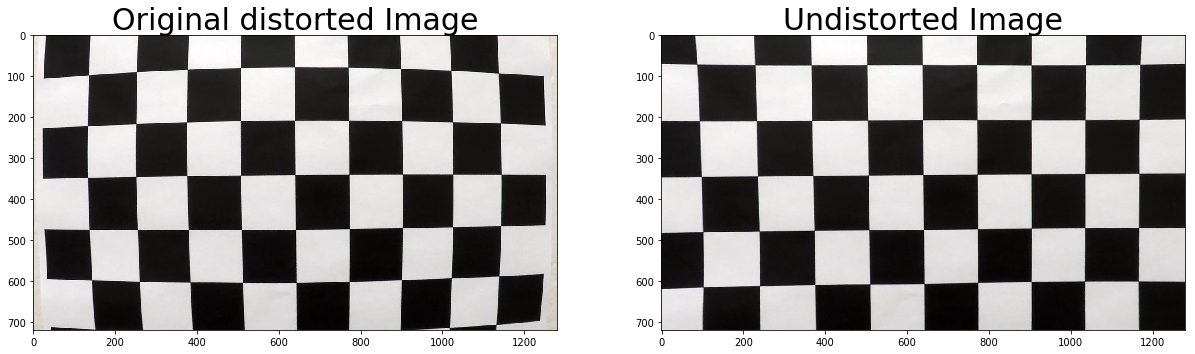

In [7]:
def distortion_remover(img):
    """ function:Removing the camera distortion from a image
        aurg1: a RGB image (with camera distortion)
        return: a RGB image (withoute camera distortion) """ 
    
    with open("output_images/dist_pickle.p", "rb") as f:
    # The pickle protocol version used is detected automatically, so we do not have to specify it.
        # Load camera calibration data
        dist_pickle = pickle.load(f)
        # Extract the calibration data
        mtx = dist_pickle["mtx"]
        dist = dist_pickle["dist"]
        
    # Undistortion an image
    undist_img = cv2.undistort(img, mtx, dist, None, mtx)
    return undist_img

#reading in an image
raw_img = mpimg.imread('camera_cal/calibration1.jpg')

undistorted_img = distortion_remover(raw_img)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.2, hspace=0.1)

ax1.imshow(raw_img)
ax1.set_title('Original distorted Image', fontsize=30)
ax2.imshow(undistorted_img)
ax2.set_title('Undistorted Image', fontsize=30)

# Save the result as image
plt.savefig(r"./output_images/camera_calibration_undistorted_image.jpg")